# Exploration project on Student Assessment Data (PISA 2012)

## Hind Baageel

## Preliminary Wrangling

> In this project, we used a dataset called PISA-2012. PISA is a survey of students' skills and knowledge along with other features. It is not a
conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 

Original dataset contains 510,000 students with 635 features. The dataset was modified to include only 50 features to simplfiy the exploration task in this project. 



In [339]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

> Loading the Dataset

In [340]:
df =pd.read_csv('pisa2012_modified.csv')

In [341]:
df.head()

,Index,CNT,NC,SchoolID,StudentID,Grade,BirthYear,Gender,Late,SkipWholedDay,...,T_strategy5,T_strategy6,School_Enviroment1,School_Enviroment2,School_Enviroment3,School_Enviroment4,PV1MATH,PV1READ,PV1SCIE,W_FSTUWT
0,1,Albania,Albania,1,1,10,1996,Female,None,None,...,Always or almost always,Often,Agree,Strongly disagree,Strongly disagree,Agree,406.8469,249.5762,341.7009,8.9096
1,2,Albania,Albania,1,2,10,1996,Female,One or two times,None,...,NaN,NaN,NaN,NaN,NaN,NaN,486.1427,406.2936,548.9929,8.9096
2,3,Albania,Albania,1,3,9,1996,Female,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,533.2684,401.2100,499.6643,8.4871
3,4,Albania,Albania,1,4,9,1996,Female,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,412.2215,547.3630,438.6796,8.4871
4,5,Albania,Albania,1,5,9,1996,Female,One or two times,None,...,Often,Often,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,381.9209,311.7707,361.5628,8.4871


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222626 entries, 0 to 222625
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     222626 non-null  int64  
 1   CNT                       222626 non-null  object 
 2   NC                        222626 non-null  object 
 3   SchoolID                  222626 non-null  int64  
 4   StudentID                 222626 non-null  int64  
 5   Grade                     222626 non-null  int64  
 6   BirthYear                 222626 non-null  int64  
 7   Gender                    222626 non-null  object 
 8   Late                      218791 non-null  object 
 9   SkipWholedDay             218807 non-null  object 
 10  AtHome_mother             212437 non-null  object 
 11  AtHome_mother.1           203384 non-null  object 
 12  Mother_highest_Schooling  208147 non-null  object 
 13  Mother_Job_State          213424 non-null  o

> First, we have dropped the index column since it pandas dataframe already creates one

In [343]:
df = df.drop(columns='Index', axis=1)

In [344]:
df.shape

(222626, 49)

> This dataset contains 222626 entries with 50 features. The original dataset feature names has been modified to be represented in easier form. for example gender column in the original dataset is called ST04Q01. we modified most of the columns different names that can best represent the data in that column. For more information about each feature discription, please refer to the documnetation in the readme file through this link. 

In [345]:
df.duplicated().sum()

0

> There is no duplicated data in this dataset

### What is/are the main feature(s) of interest in your dataset?

> **in this dataset, we will try to invistigate if different learning stratgies can effect the learning outcomes?  the learning stratgies are represented by three variables:** 

Learning_Strategies_1:  Important Parts vs. Existing Knowledge vs. Learn by Heart

Learning_Strategies_2:  Other Subjects vs. Learning Goals vs. Rehearse Problems

Learning_Strategies_4:  Repeat Examples vs. Everyday Applications vs. More Information

> **we wanted to check if the teaching stratgies can effect the learning outcomes through the follwing variables:** 

T_strategy1 - set clear goals 

T_strategy2 - Encourages Thinking and Reasoning

T_strategy3 - Differentiates Between Students When Giving Tasks

T_strategy4 - Checks Understanding

T_strategy5  - Helps Learn from Mistakes

T_strategy6 - Apply What We Learned

> **we also wanted to check if certain possession are assossicated with better learning outcomes: these possison include:** 

Possessions_own room - If the student owns a seperate room 

Possessions_study_place - the student has a study place

Possessions_computer - the student owns a computer 

Possessions_textbooks - the student owns course textbooks

BooksAtHome -  number of books at student's home

>**lastly, we wanted to see if the school enviroment and student perception on their schools affect their learning process. 4 features were included in the invistgation process:** 

School_Enviroment1 - Make Friends Easily

School_Enviroment2 - Things Are Ideal at School

School_Enviroment3 -  Feel Lonely at School

School_Enviroment4 -  Feel Happy at School



## Univariate Exploration

First, we will explore the grade columns to see what is the most common grade in our data. 

In [346]:
df['Grade'].value_counts()

10    105085
9      72595
11     25869
8      14352
12      3079
7       1531
96       114
13         1
Name: Grade, dtype: int64

(1.0, 15.0)

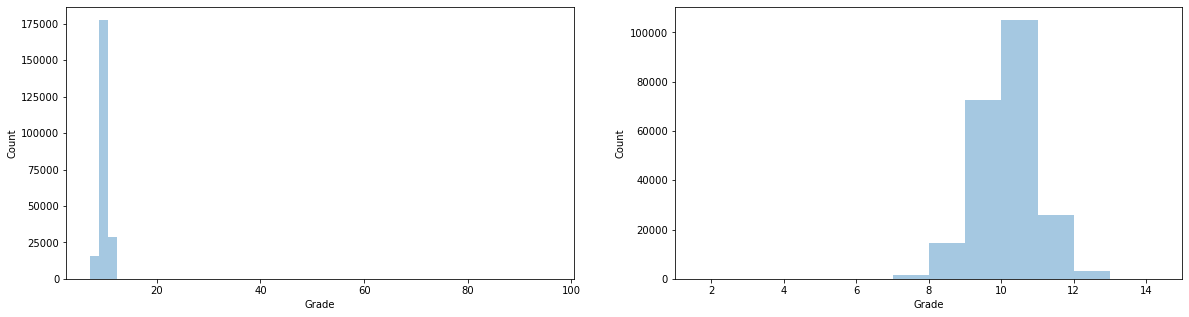

In [347]:
plt.figure(figsize = [20, 5])


plt.subplot(1, 2, 1)
sb.distplot(df['Grade'], kde=False)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
#changing the bins to have one grade difference bettween each bin
bins = np.arange(1, df['Grade'].max()+1, 1)

#plotting
sb.distplot(df['Grade'], kde=False, bins=bins)
plt.ylabel('Count')

#to remove extreme outliers in grade 96 from the histogram
plt.xlim(1,15)

from the first subplot, we can see that the histogram was shifted to the left because of the extreme outliers: students in grade 96. Thus, we will remove them from the figure so that we can observe the highest count better. In the second plot we removed the outliers and we changed the bins to have only one as grade difference. 

> ### **Great! we can see from the second plot that most of the student count comes from grade 10 is the highest followed by grade 9 then grade 11.**

-------------------------------

In [348]:
df['Gender'].value_counts()

Female    112561
Male      110065
Name: Gender, dtype: int64

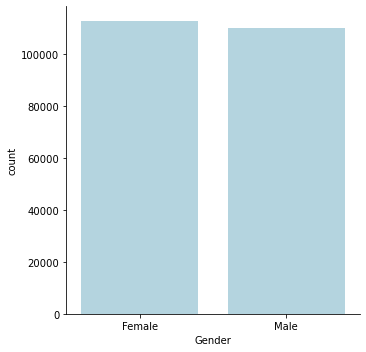

In [349]:
sb.catplot(x="Gender",kind='count', color= 'lightblue', data=df)

>Since the difference between two bars is small, we better highlight the difference by making the bars with two different color to distiguish bars

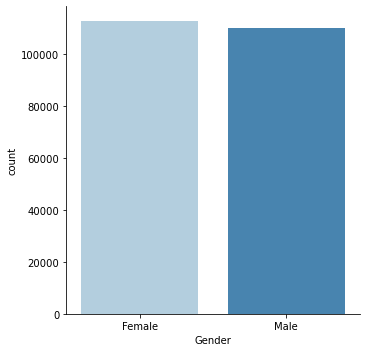

In [350]:
sb.catplot(x="Gender",kind='count', palette="Blues", data=df)

> ### **From the figure we can see that female students in this dataset is slightly higher than the male students. Since that the difference is small compared to the overall count (only 2000 entries), it better to not zoom in the difference in the figure to avoid biases in thinking that the number of female students is much higher than male students.**

--------------------------------------------------------

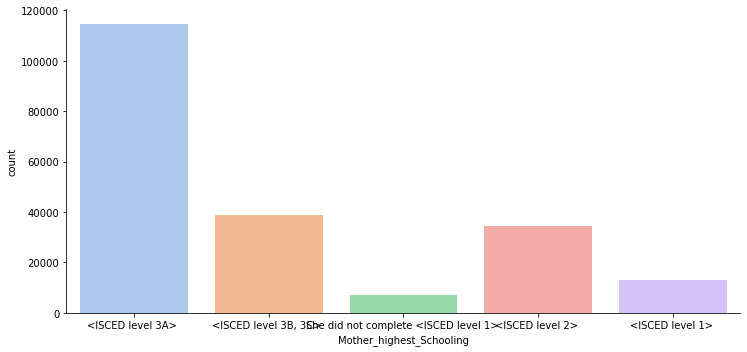

In [351]:
sb.catplot(x="Mother_highest_Schooling",kind='count', palette="pastel", data=df)

plt.gcf().set_size_inches(12, 5)

This figure is a little bit missy and needs some formating to be more formal and clear. First, the x axis labels are overlapped. we need rotate x labels to make it more readable. Secondly, since that there is no use of the colors, we can remove them and keep only one color. Thirdly, we should order the bars according to thier count to highlight the highest category in mother highest schooling. Lastly, we can add text labels above bars to indicate the precentage of each category. 

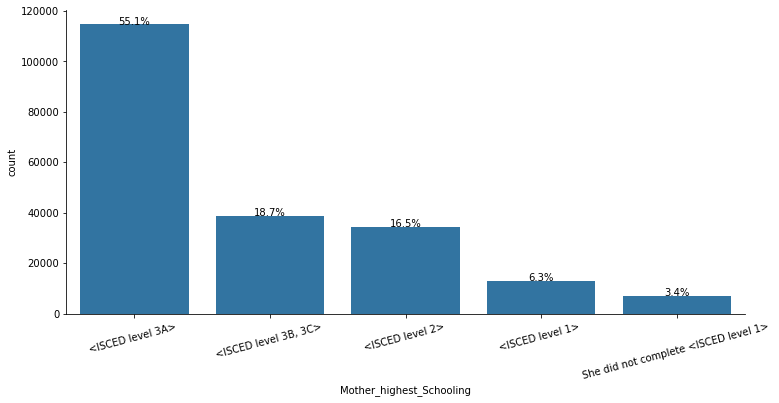

In [352]:
n_count = df['Mother_highest_Schooling'].value_counts().sum()

type_counts = df['Mother_highest_Schooling'].value_counts()

#to order the bars by their counts
type_order = type_counts.index

#finding the base color to color all bars with the same color
base_color = sb.color_palette()[0]

#plotting
sb.catplot(x="Mother_highest_Schooling",kind='count', color=base_color, data=df, order=type_order)

plt.gcf().set_size_inches(15, 5)

plt.xticks(rotation=15);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=15)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

> ### **Great! Now we can see that more than the half of the particpants mothers completed ISCED level 3A. On the other hand, only 3.4% of particpants mothers didn't complete ISCED level 1.** 

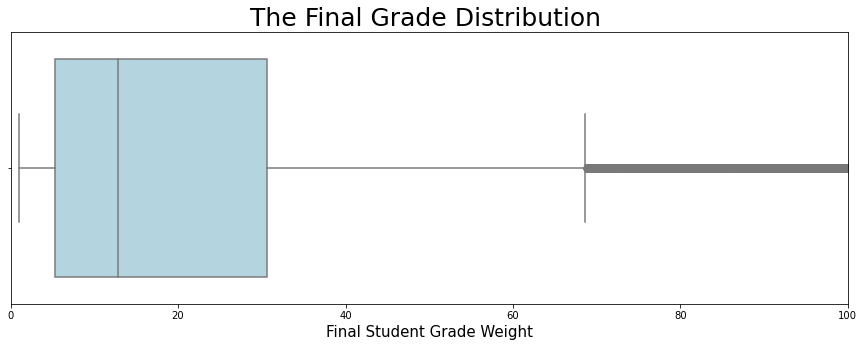

In [353]:
ax = sb.boxplot(x=df["W_FSTUWT"], color='lightblue')
ax.set_xlabel('Final Student Grade Weight', fontsize=15)
ax.set_title("The Final Grade Distribution ", fontsize=25);

plt.gcf().set_size_inches(15, 5)

plt.xlim((0,100));

> ### **We can see that most students final score falls around 10 to 14**

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [354]:
df['Late'].value_counts()

None                     140176
One or two times          55655
Three or four times       14021
Five or more times         8939
Name: Late, dtype: int64

Text(0, 0.5, 'Final Student Weight')

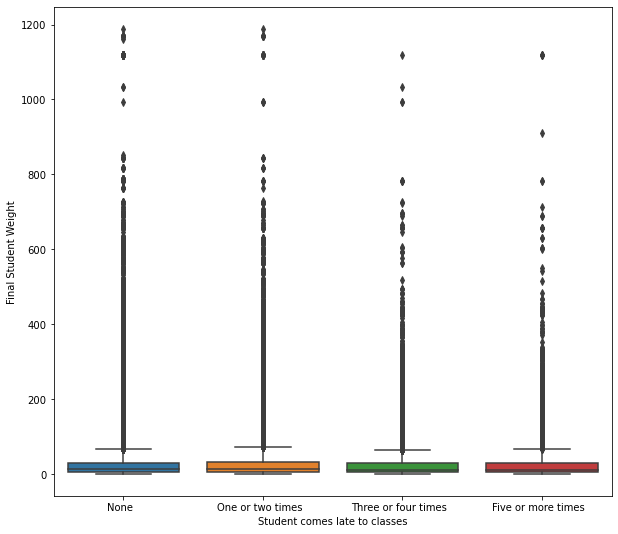

In [355]:
sb.boxplot(data = df, x = 'Late', y = 'W_FSTUWT');

plt.gcf().set_size_inches(10, 9)
plt.xlabel('Student comes late to classes')
plt.ylabel('Final Student Weight')

The figure is unreadable due to the extreme outliers in final student weight. we will try to remove them from the figure to better observe box plot information. 

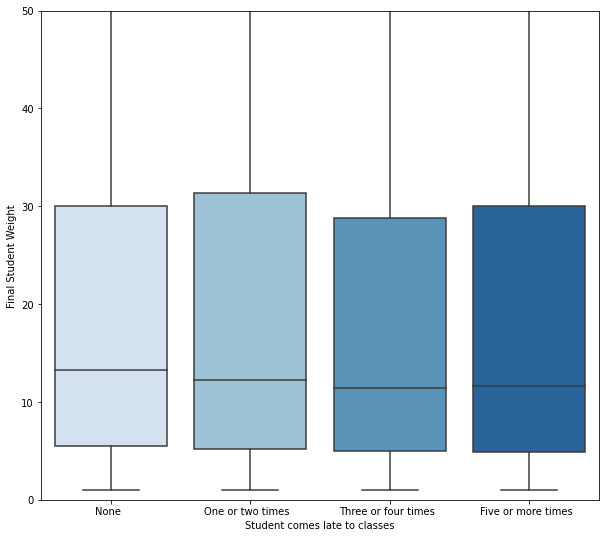

In [356]:
sb.boxplot(data = df, x = 'Late', y = 'W_FSTUWT', palette="Blues");

plt.gcf().set_size_inches(10, 9)
plt.xlabel('Student comes late to classes')
plt.ylabel('Final Student Weight')

plt.ylim((0,50));

> ### **We can observe from the figure that the student that have never came late has scored better on average. However, the students who came late one or two times have higher third quartile range than the others.**

----------------------------------------

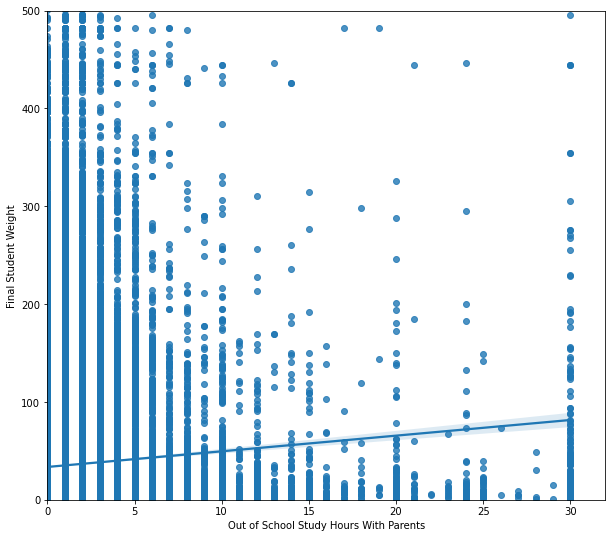

In [357]:
sb.regplot(data = df, x = 'OSST_Parents', y = 'W_FSTUWT');
plt.xlabel('Out of School Study Hours With Parents')
plt.ylabel('Final Student Weight')

plt.gcf().set_size_inches(10, 9)

plt.ylim((0,500));

plt.xlim((0,32));

> ### **At first glance, we can say that there is a negative relationship between hours of study at home with parents and the final student weight, but there is an exception at 30 hours per week where student weight have increased sharply.**

-------------------------------------------------------------------------------------

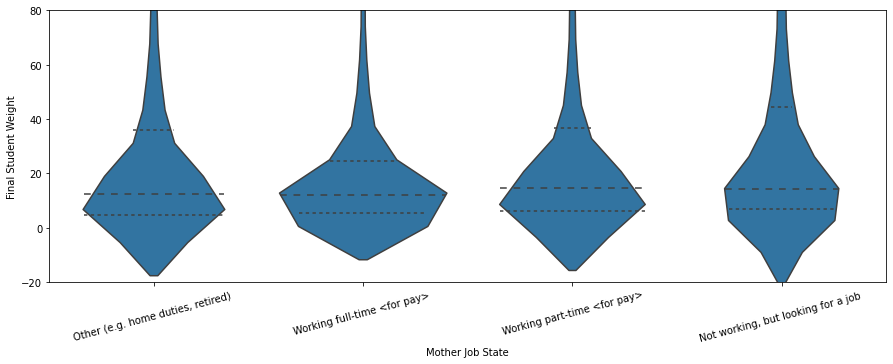

In [358]:
plt.figure(figsize = [15, 5])

sb.violinplot(data = df, x ='Mother_Job_State', y = 'W_FSTUWT', color=base_color, inner='quartile');

plt.xlabel('Mother Job State')
plt.ylabel('Final Student Weight')

plt.ylim((-20,80));
plt.xticks(rotation=15);


> ### **from the above figure, we can see that students that have stay at home mothers or with part time job score better on average than student that have mothers working full time job or other reasons.**

## Multivariate Exploration


Text(0, 0.5, 'Final Student Weight')

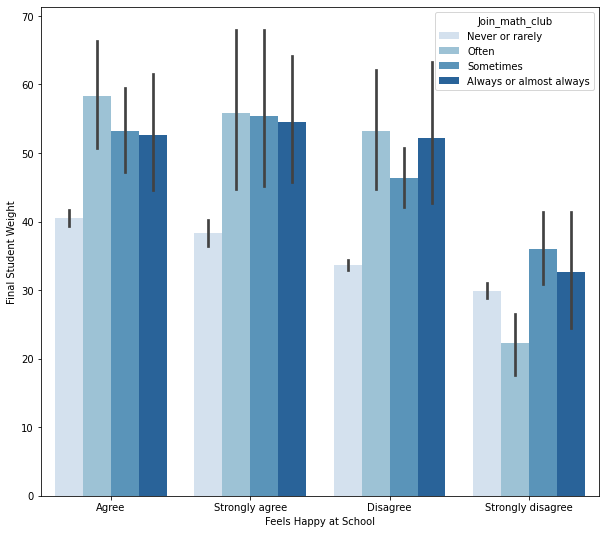

In [359]:
sb.barplot(data = df, x = 'Math_Anxiety', y='W_FSTUWT', hue = 'Join_math_club', palette="Blues")

plt.gcf().set_size_inches(10, 9)\

plt.xlabel('Feels Happy at School')
plt.ylabel('Final Student Weight')

> ### **Surprisingly, we can see that students with higher math anxity scores better at final student weight than those who don't even with they attend math clubs. Students who never or often join math club and don't have math anxity performed the worst among others.** 

------------------------------------------------------

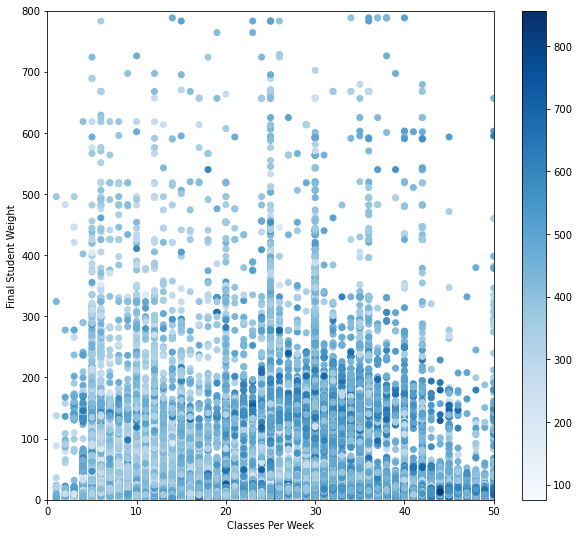

In [360]:
cm = plt.cm.get_cmap('Blues') #BuPu

plt.scatter(data = df, x ='Classes_per_week', y='W_FSTUWT', c = 'PV1MATH', cmap=cm)
plt.colorbar()

plt.gcf().set_size_inches(10, 9)

plt.xlabel('Classes Per Week')
plt.ylabel('Final Student Weight')

plt.xlim((0,50));
plt.ylim((0,800));

> ### **In the above figure, math assesment results is represented by the color bar. Darker points indicate higher results in math assessment while light ones indicate low scores. We can see from the figure that higher number of classes per week has resulted in better math results even though the average final student scores falls at the same level as other students with lower classes per week**

---------------------------------------

In [361]:
df['T_strategy1'].value_counts()

Most Lessons            53437
Every Lesson            50246
Some Lessons            30152
Never or Hardly Ever     9525
Name: T_strategy1, dtype: int64

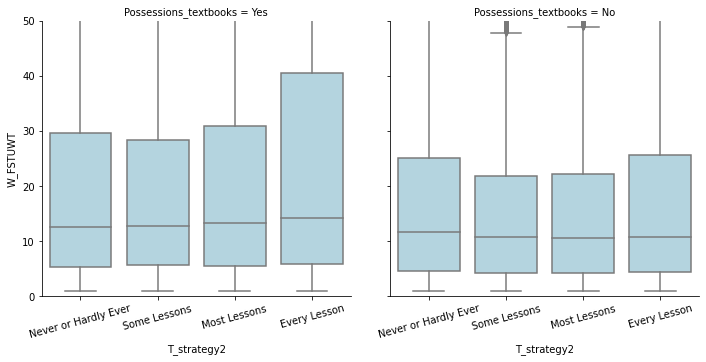

In [363]:
order_b =['Never or Hardly Ever','Some Lessons', 'Most Lessons', 'Every Lesson']

g = sb.FacetGrid(data = df, col = 'Possessions_textbooks', height = 4,col_wrap=4, sharey=True)

g.map(sb.boxplot, 'T_strategy2', 'W_FSTUWT', order = order_b, color='lightblue')

#to apply changes in all facets[]
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        
plt.gcf().set_size_inches(20, 5)

plt.ylim((0,50));


> ### **We can see from the figure that in case teachers encouraged thinking and reasoning while student owns the required text books, the student achieved better scores on average.**

# The End